# Clustering Case Study: Customer Segmentation with K-Means -  Tier 3
***
This case study is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by the `yhat` blog. Please feel free to refer to the post for additional information, and solutions.

Structure of the mini-project:

1. **Sourcing and loading**
    * Load the data
    * Explore the data


2. **Cleaning, transforming and visualizing**
    * Data Wrangling: Exercise Set 1
        - Creating a matrix with a binary indicator for whether they responded to a given offer
        - Ensure that in doing so, NAN values are dealt with appropriately
    

3. **Modelling** 
    * K-Means clustering: Exercise Sets 2 and 3
        - Choosing K: The Elbow method
        - Choosing K: The Silhouette method
        - Choosing K: The Gap statistic method
    
    * Visualizing clusters with PCA: Exercise Sets 4 and 5


4. **Conclusions and next steps**
    * Conclusions
    * Other clustering algorithms (Exercise Set 6)

In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## 1. Sourcing and loading
### 1a. Load the data
The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [2]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheet_name=0)

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


### 1b. Explore the data

In [3]:
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [4]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## 2. Cleaning, transforming and visualizing
### 2a. Data Wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [5]:
#your turn
df_2 = pd.merge(df_transactions, df_offers, on='offer_id')
pivot_df = pd.pivot_table(df_2, index = ['customer_name'], columns = ['offer_id'], values=['n'], aggfunc = 'sum', fill_value = 0)

## 3. Modelling 
### 3a. K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

#### 3ai. Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

**Hint:** the Elbow Method is discussed in part 2 of the Harvard Clustering lecture. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

In [6]:
a = [i for i in range(1,33)]
pivot_df.columns = a

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

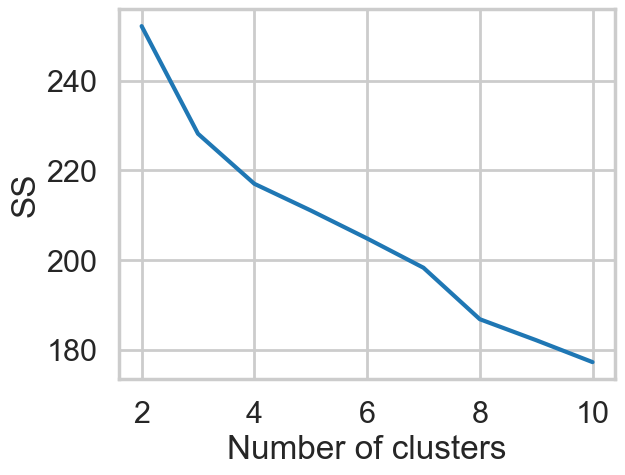

In [7]:
# your turn
#first we need to select all the columns except for the customer name
x_cols = pivot_df.reset_index().drop(columns = 'customer_name')

#we need to import KMeans and then iterate over the number of clusters from 1 to 11 and save the result in wcss
from sklearn.cluster import KMeans
wcss = []
ks = range(2, 11)
for i in ks:
    kmeans = KMeans(n_clusters = i, random_state = 123, n_init = 'auto').fit(x_cols)
    wcss.append(kmeans.inertia_)

plt.plot(ks, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('SS')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


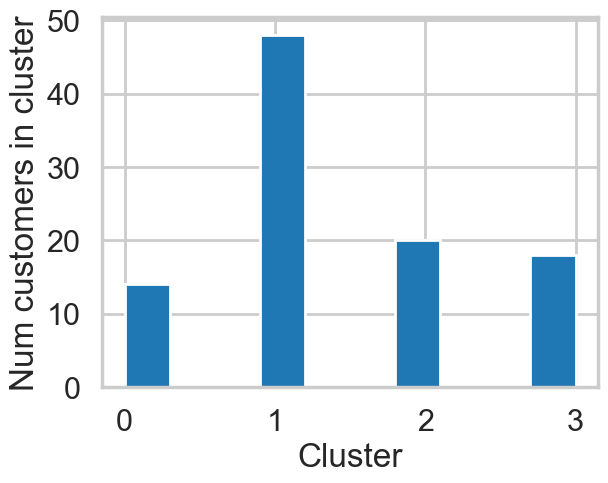

In [8]:
best_k = 4
best_kmeans = KMeans(n_clusters = best_k, random_state = 123, n_init = 'auto').fit(x_cols)
plt.hist(best_kmeans.predict(x_cols))
plt.xlabel('Cluster')
plt.ylabel('Num customers in cluster')
plt.show()

- Before running the K-Means clustering excercise it is very difficult to know how many clusters we can expect. I would imagine the number would be max 12 but probably a smaller number (considering we are looking at monthly promotions)
- From the elbow plot is very difficult to identify the optimal K that makes the selection of the optimal K. The choice is divided between 3, 4 or 8 as these are the points where we see the biggest inflexion in the graph. I am not very comfortable with chosing one option and would probably run the analysis as both 4 or 8 clusters to dig deeper. However, for the sake of this exercise I will select an optimal K of 4. to pick 
?

#### 3aii. Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

**Hint**: Scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alfredo\AppData\Local\Temp\ipykernel_2628\3707811747.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Spectral")
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Alfredo\AppData\Local\Temp\ipykernel_2628\3707811747.py:48: MatplotlibDeprecationWarning: The ge

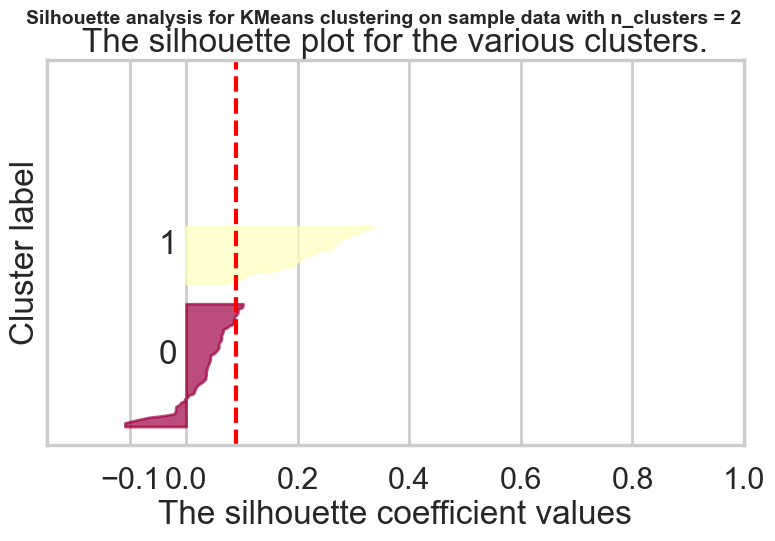

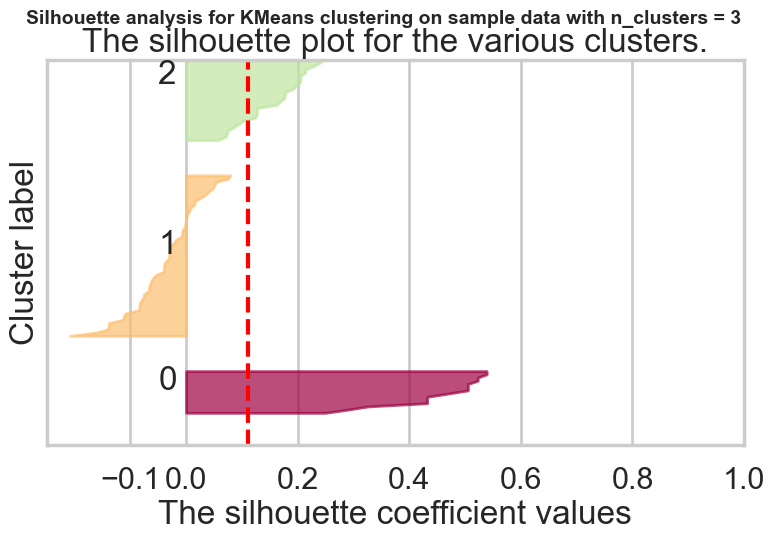

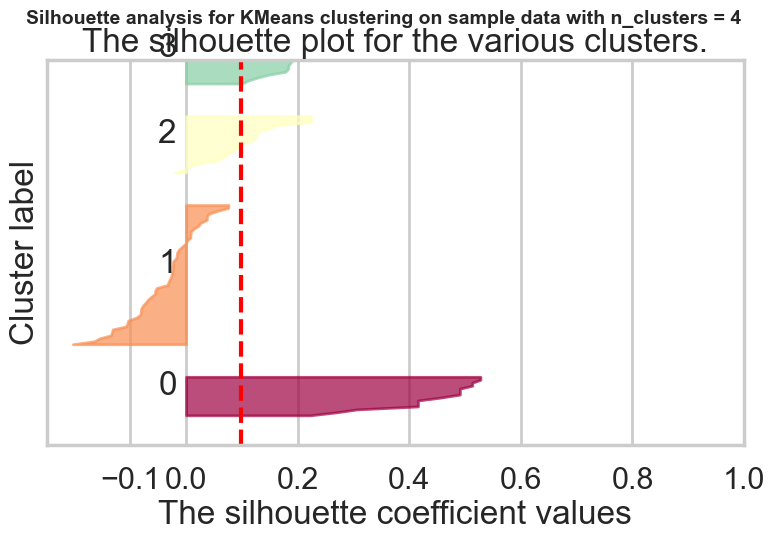

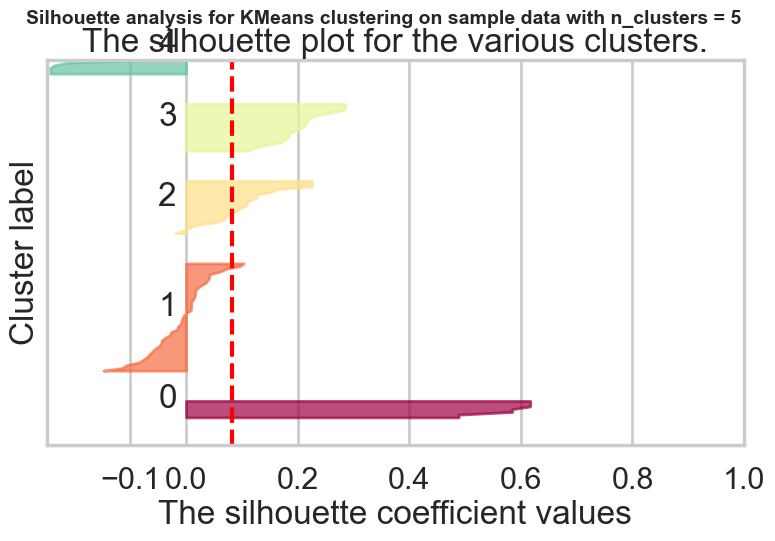

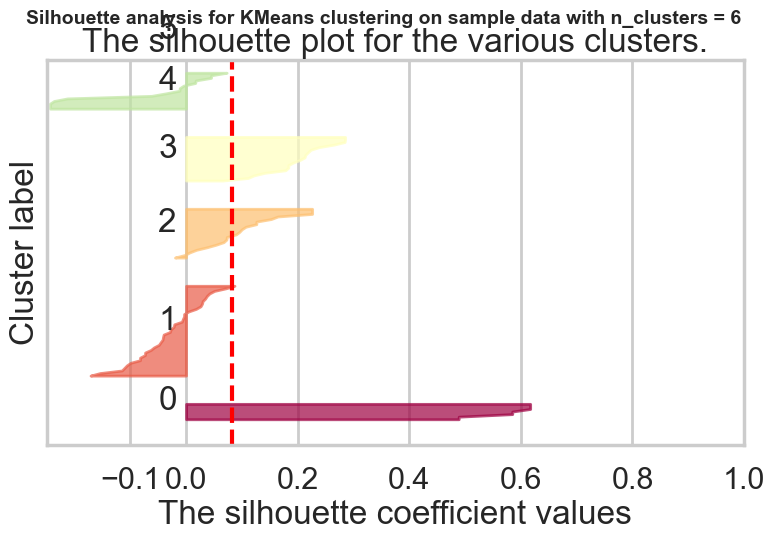

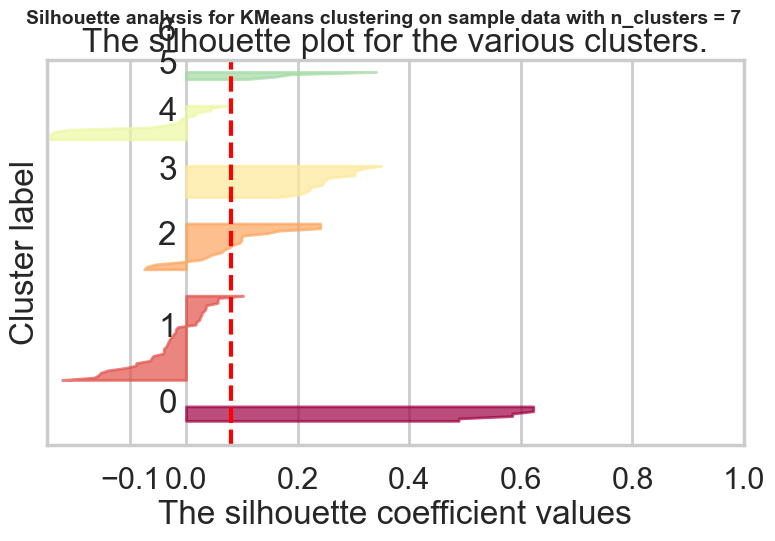

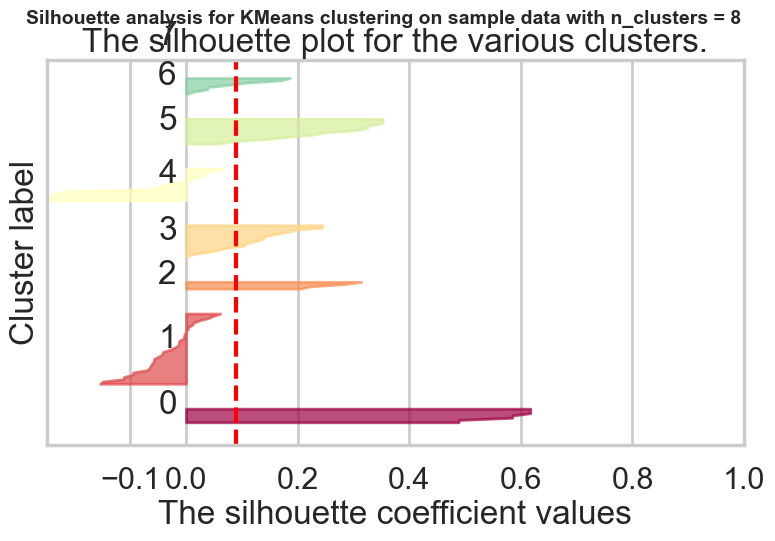

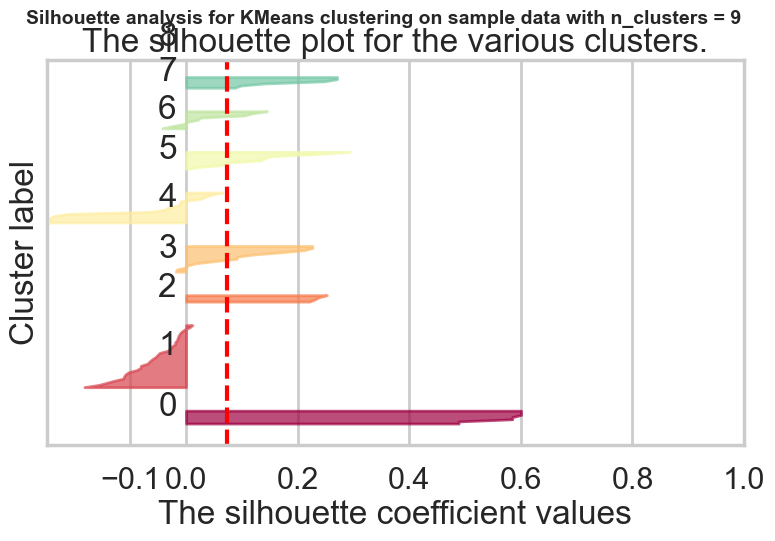

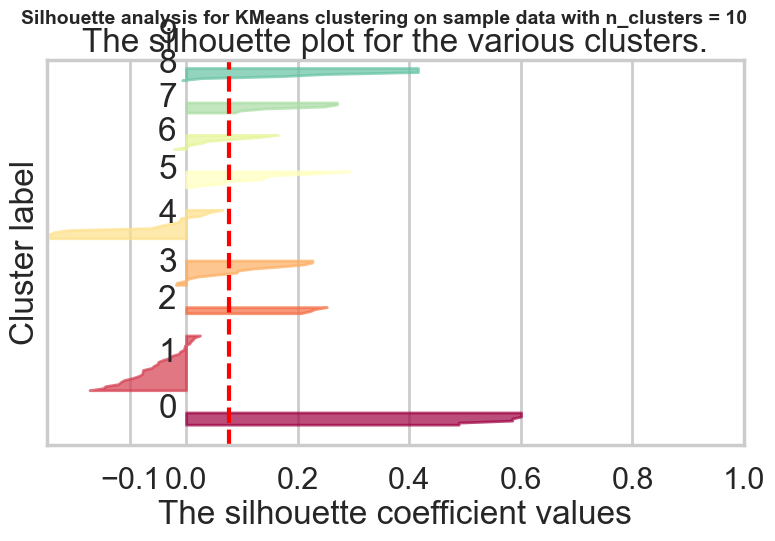

In [9]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

#empty list of slihoutte scores
silh = []

# Iterate through the same range as before
for k in ks:
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(9, 5)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.25, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_cols) + (i + 1) * 10])

    # Initialize the clusterer
    kmeans = KMeans(n_clusters=k, random_state=123,  n_init = 'auto')
    cluster_labels = kmeans.fit_predict(x_cols)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    # Make a variable called silhouette_avg. Set the parameters to silhouette_score to x_cols, and cluster_labels
    silhouette_avg  = sklearn.metrics.silhouette_score(x_cols, cluster_labels)
    silh.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    # Call sklearn.metrics.silhouette_samples with the below parameters
    sample_silhouette_values = silhouette_samples(x_cols, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        # Make a variable called ith_cluster_silhouette_values
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Call sort() on this variable 
        ith_cluster_silhouette_values.sort()
    
        # Call shape[0] on ith_cluster_silhouette_values 
        size_cluster_i = ith_cluster_silhouette_values.shape[0] 
        y_upper = y_lower + size_cluster_i

        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        # This requires calling text() on ax1 
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting title, xlabel and ylabel 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    # This requires axvline() 
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')
    

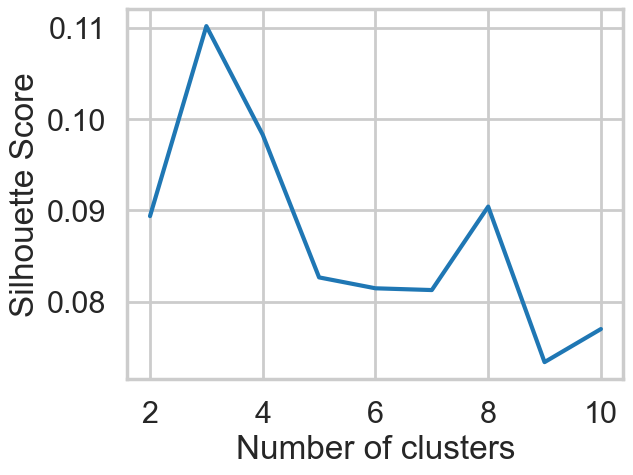

In [10]:
# Your turn.
plt.plot(ks, silh)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

print() 

From the results above, it does not look like any of the clusters really builds a good structure. The best option would be K=2 but even this result is below the .25 average silhouette width to make it seem these clusters have substancial structure.

#### 3aiii.  Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

#### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

**Hint:** See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

### 3b. Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

**Hint:** PCA was discussed in the previous subunit. If you need help with it, consult [this useful article](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c) and [this visual explanation](http://setosa.io/ev/principal-component-analysis/). 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

In [11]:
#your turn
from sklearn.decomposition import PCA

pca = PCA(n_components  =2)
x_cols_reduced = pca.fit_transform(x_cols)

In [12]:
df_PCA = pd.DataFrame({'customer_name':pivot_df.reset_index()['customer_name'], 'cluster':best_kmeans.predict(x_cols), 'PCA1':x_cols_reduced[:,0], 'PCA2':x_cols_reduced[:,1]})
print(df_PCA.head())

  customer_name  cluster      PCA1      PCA2
0         Adams        3  1.007580  0.108215
1         Allen        1 -0.287539  0.044715
2      Anderson        0 -0.392032  1.038391
3        Bailey        3  0.699477 -0.022542
4         Baker        1  0.088183 -0.471695


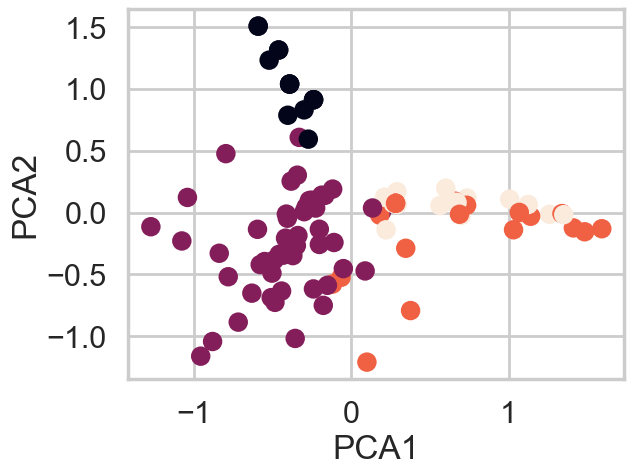

In [13]:
plt.scatter(x=df_PCA['PCA1'], y = df_PCA['PCA2'], c = df_PCA['cluster'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

the clusters seem to be overlapping on multiple areas, specially on the positive range of the PCA1 component. Based on the results is possible that 3 clusters might have been more appropriate (with 1 cluster covering everything higher than PCA1 > 0)

In [20]:
pivot_df['pred'] = best_kmeans.predict(x_cols)
pivot_df.head()

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,pred
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,3
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
Anderson,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,3
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [96]:
df_res = pivot_df.reset_index().melt(id_vars = ['customer_name', 'pred'], var_name = 'offer_id', value_name = 'purchased')

In [97]:
df_res = pd.merge(df_res, df_offers, how='inner', on='offer_id')

In [120]:
a = pd.pivot_table(df_res, values= 'purchased', index = 'varietal', columns = 'pred', aggfunc = 'sum')
a.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '20px'}) 

pred,0,1,2,3
varietal,,,,
Cabernet Sauvignon,0,31,0,1
Champagne,0,69,11,1
Chardonnay,0,15,0,0
Espumante,0,3,28,9
Malbec,0,16,8,8
Merlot,0,14,4,2
Pinot Grigio,0,1,6,10
Pinot Noir,34,10,0,0
Prosecco,0,21,9,13


From these results, we can see that the clusters 0 and 1 are somewhat divided by the type of wine. the more specific types of wine (Pinot Noir and lighter wines like Cabernet Sauvignon, Champagne, Chardonnay) included on both cluster 1 and 2. cluster 2 also has some wines that spill over to cluster 2 and 3 and cluster 3 and these 2 clusters are a mix of different wines. Maybe these can be explained based on the month of execution:

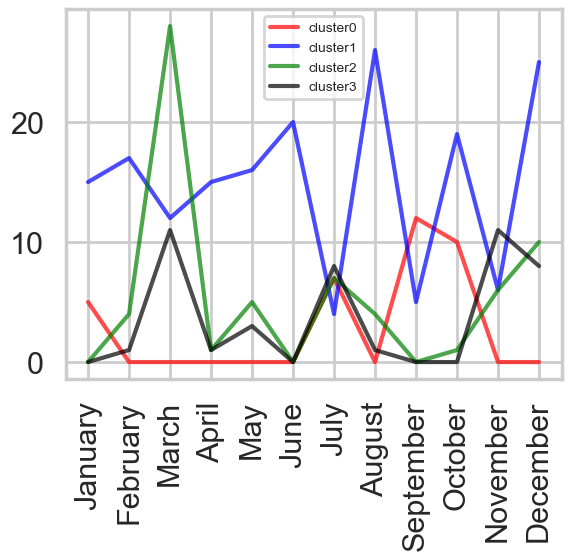

In [153]:
a = pd.pivot_table(df_res, values= 'purchased', index = 'campaign', columns = 'pred', aggfunc = 'sum').reset_index()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
a['campaign'] = pd.Categorical(a['campaign'], categories=months, ordered=True)
a = a.sort_values(by='campaign')
plt.plot(a['campaign'], a[0], c='r', label = 'cluster0', alpha = 0.7)
plt.plot(a['campaign'], a[1], c='b', label = 'cluster1', alpha = 0.7)
plt.plot(a['campaign'], a[2], c='g', label = 'cluster2', alpha = 0.7)
plt.plot(a['campaign'], a[3], c='k', label = 'cluster3', alpha = 0.7)
plt.legend(fontsize = "10")
plt.xticks(rotation = 90)
plt.show()

Regarding the month of execution of the promo, it looks like cluster 0 is the best defined with most shopping happening in September, October and July. Next is cluster2 which seems to include promotions around March mostly and Cluster3 which includes the monht of march, July and November.

In [157]:
a = pd.pivot_table(df_res, values= 'purchased', index = 'min_qty', columns = 'pred', aggfunc = 'sum')
a.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '20px'}) 

pred,0,1,2,3
min_qty,,,,
6,12,10,49,39
12,7,10,3,2
72,5,118,9,2
144,10,42,5,1


Regarding the min qty of promotions, cluster 1 seem to be more reactive to larger min qtys while cluster 2 and 3 seem to be more reactive to smaller min qtys.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0.5, 1.0, 'Cluster 3')

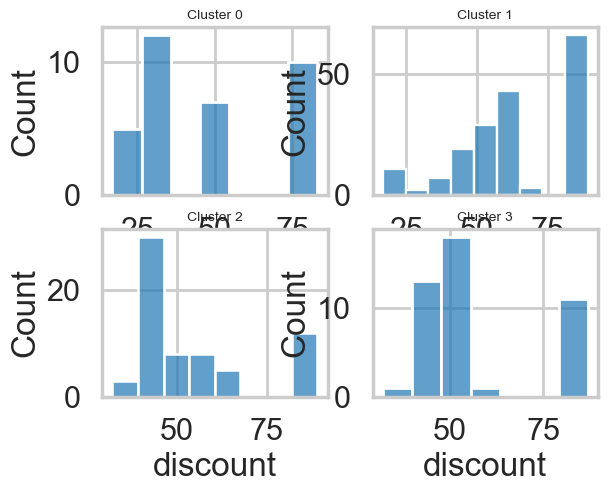

In [180]:
fig, ax = plt.subplots(2,2)
a = sns.histplot(ax = ax[0,0], data=df_res[(df_res['purchased']==1) & (df_res['pred']==0)], x = 'discount', alpha=0.7)
a.axes.set_title('Cluster 0', fontsize = 10)
b = sns.histplot(ax = ax[0,1], data=df_res[(df_res['purchased']==1) & (df_res['pred']==1)], x = 'discount', alpha=0.7)
b.axes.set_title('Cluster 1', fontsize = 10)
c = sns.histplot(ax = ax[1,0], data=df_res[(df_res['purchased']==1) & (df_res['pred']==2)], x = 'discount', alpha=0.7)
c.axes.set_title('Cluster 2', fontsize = 10)
d = sns.histplot(ax = ax[1,1], data=df_res[(df_res['purchased']==1) & (df_res['pred']==3)], x = 'discount', alpha=0.7)
d.axes.set_title('Cluster 3', fontsize = 10)


When it comes to the reaction to a specific discount level, it looks like all clusters are all over the different types of discount levels and there is no visible structure.


In [183]:
pd.pivot_table(df_res, values= 'purchased', index = 'past_peak', columns = 'pred', aggfunc = 'sum')

pred,0,1,2,3
past_peak,,,,
False,34,146,56,31
True,0,34,10,13


Regarding the past_peak. theres no major influence of this variable on the decision to purchase. it looks like all clusters tend to perform better for promotions not past_peak

In [188]:
df_res.columns()

,customer_name,pred,offer_id,purchased,campaign,varietal,min_qty,discount,origin,past_peak
0,Adams,3,1,0,January,Malbec,72,56,France,False
1,Allen,1,1,0,January,Malbec,72,56,France,False
2,Anderson,0,1,0,January,Malbec,72,56,France,False
3,Bailey,3,1,0,January,Malbec,72,56,France,False
4,Baker,1,1,0,January,Malbec,72,56,France,False


(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

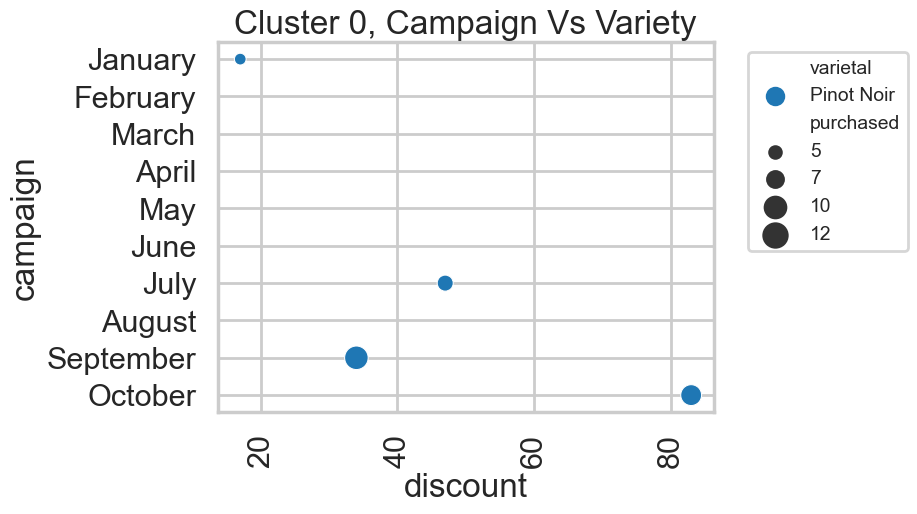

In [242]:
a = pd.pivot_table(df_res, values= 'purchased', index = ['campaign', 'varietal', 'pred', 'discount'], aggfunc = 'sum').reset_index()
a['campaign'] = pd.Categorical(a['campaign'], categories=months, ordered=True)
a = a.sort_values(by='campaign')
g = sns.scatterplot(data = a[(a['purchased']>0)&(a['pred']==0)], hue = 'varietal', y='campaign', size = 'purchased', x='discount')
g.set_title('Cluster 0, Campaign Vs Variety')
plt.legend(fontsize = 'xx-small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 90)

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

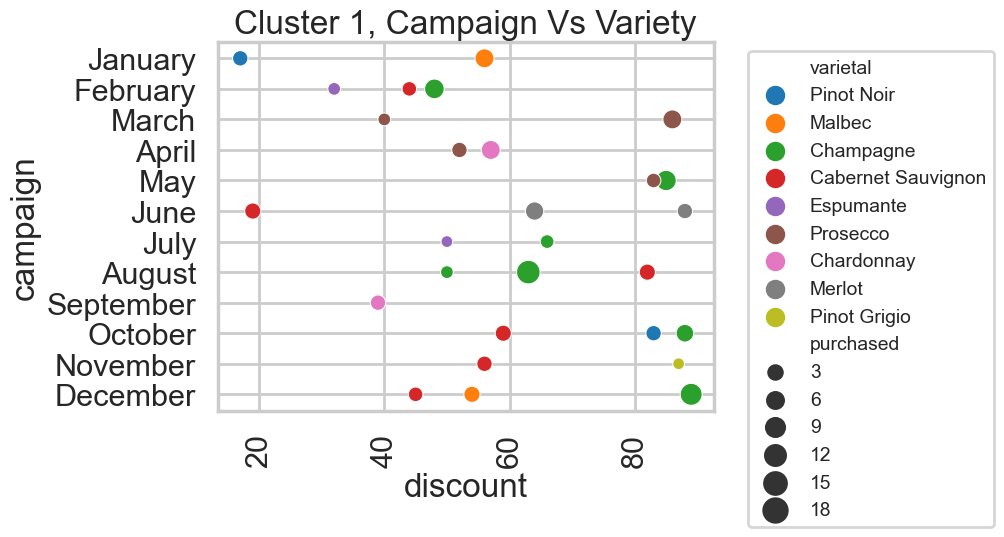

In [241]:
g = sns.scatterplot(data = a[(a['purchased']>0)&(a['pred']==1)],  hue = 'varietal', y='campaign', size = 'purchased', x='discount')
g.set_title('Cluster 1, Campaign Vs Variety')
plt.legend(fontsize = 'xx-small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 90)

(array([ 20.,  40.,  60.,  80., 100.]),
 [Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

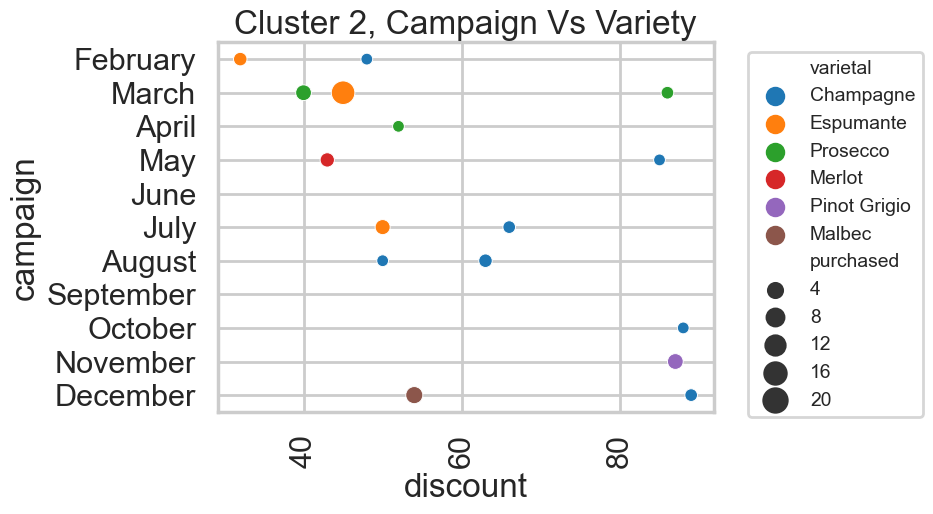

In [243]:
g = sns.scatterplot(data = a[(a['purchased']>0)&(a['pred']==2)],  hue = 'varietal', y='campaign', size = 'purchased', x='discount')
g.set_title('Cluster 2, Campaign Vs Variety')
plt.legend(fontsize = 'xx-small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 90)

(array([ 20.,  40.,  60.,  80., 100.]),
 [Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

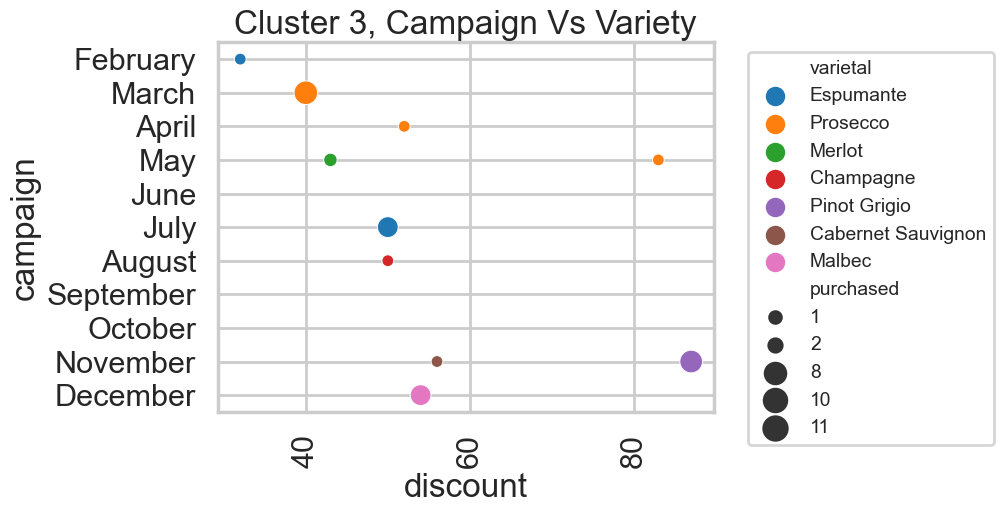

In [244]:
g = sns.scatterplot(data = a[(a['purchased']>0)&(a['pred']==3)],  hue = 'varietal', y='campaign', size = 'purchased', x='discount')
g.set_title('Cluster 3, Campaign Vs Variety')
plt.legend(fontsize = 'xx-small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 90)

After our analysis, we can conclude that most of the customers seem to need higher discounts as the year goes by. when clustering the results we identified that the variety of the wine as well as the month of the campaign have the most significance with the discount adding a bit of separation. The clusters can be identified as:
Cluster0: Customers inclined for Pinot noir with no major reaction to the discount level and tendencies to react in the months of September and October.
Cluster1: Customers with preference for lighter wines and champagnes, mostly reactive to discounts of over 40%
Cluster2: Preference for espumantes and champagnes but independent of the discount.
Cluster3: Customers that have preferences for Prosecco, Pinot Grigio and Malbec with high reaction to discounts 40%-60% and neededing high discount for Pinot Grigio in November.


What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

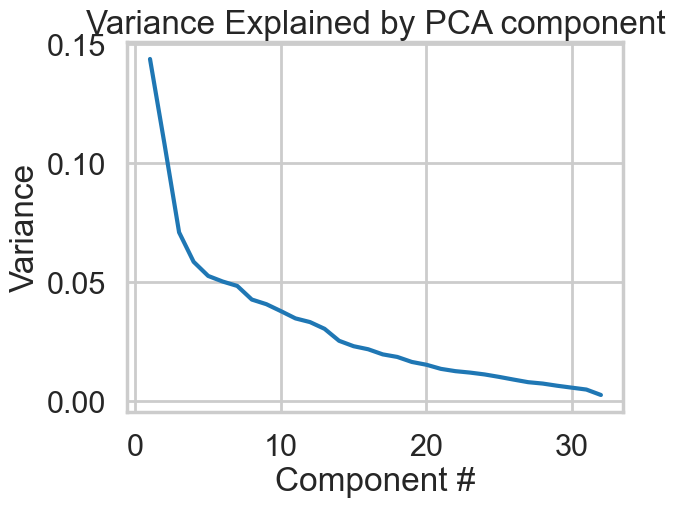

In [261]:
#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(x_cols)

# Do the rest on your own :)
plt.plot(range(1,33), pca.explained_variance_ratio_)
plt.title('Variance Explained by PCA component')
plt.xlabel('Component #')
plt.ylabel('Variance')
plt.show()

Based on the graph above, it looks like the ideal number of components is somewhere around 4 or 5 components. 

## 4. Conclusions and next steps
### 4a. Conclusions
What can you conclude from your investigations? Make a note, formulate it as clearly as possible, and be prepared to discuss it with your mentor in your next call. 

R: In this particular case the K-means algorithm did not necessarily result on well defined clusters, however the solution we identified seem to be as close to the optimal solution as possible.

### 4b. Other clustering algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


In [287]:
# First Using Affinity Progragation, we import the packages
from sklearn.cluster import AffinityPropagation
#create the model clustering and fit it to our data and save the cluster as labels
model = 'Affinity Propagation'
clustering = AffinityPropagation(random_state=123).fit(x_cols)
labels = clustering.labels_
numClusters = max(labels)+1
score = sklearn.metrics.silhouette_score(x_cols, clustering.labels_)

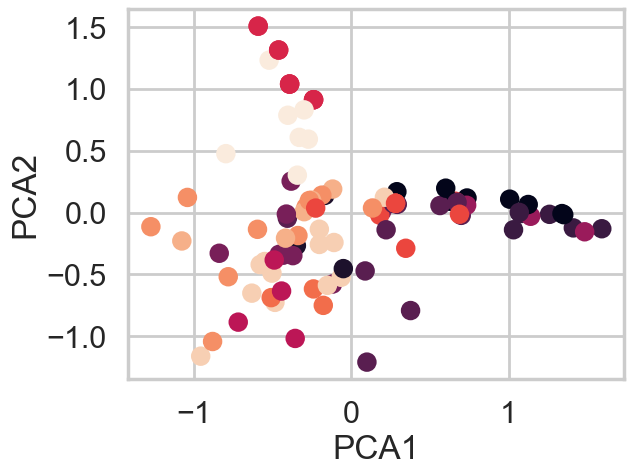

The Accuracy score measured as the average of silhouette Score is: 0.11. For a Affinity Propagation model with 14 clusters.


In [288]:
#Create a DF with the customer name and the first 2 PCA components to be able to plot them in 2D
df_PCA = pd.DataFrame({'customer_name':pivot_df.reset_index()['customer_name'], 'cluster':labels, 'PCA1':x_cols_reduced[:,0], 'PCA2':x_cols_reduced[:,1]})
plt.scatter(x=df_PCA['PCA1'], y = df_PCA['PCA2'], c = df_PCA['cluster'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()
print(f"The Accuracy score measured as the average of silhouette Score is: {score:.2f}. For a {model} model with {numClusters} clusters." )

In [321]:
# Next we will be Using Spectral clustering, we import the packages
from sklearn.cluster import SpectralClustering
#create the model clustering and fit it to our data and save the cluster as labels
model = 'Spectral clustering'
#note that we need to initialize the number of clusters for this model, in this case we will use 4 to make it comparable to the "optimal" K-Means
clustering = SpectralClustering(n_clusters=4, assign_labels='discretize', random_state=123).fit(x_cols)
labels = clustering.labels_
numClusters = max(labels)+1
score = sklearn.metrics.silhouette_score(x_cols, clustering.labels_)

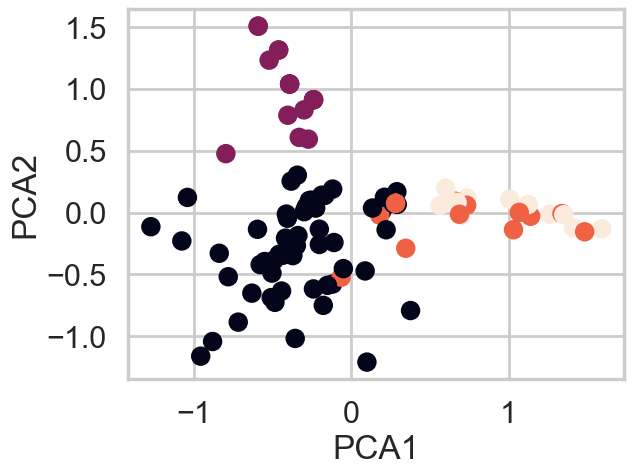

The Accuracy score measured as the average of silhouette Score is: 0.09. For a Spectral clustering model with 4 clusters.


In [322]:
#Create a DF with the customer name and the first 2 PCA components to be able to plot them in 2D
df_PCA = pd.DataFrame({'customer_name':pivot_df.reset_index()['customer_name'], 'cluster':labels, 'PCA1':x_cols_reduced[:,0], 'PCA2':x_cols_reduced[:,1]})
plt.scatter(x=df_PCA['PCA1'], y = df_PCA['PCA2'], c = df_PCA['cluster'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()
print(f"The Accuracy score measured as the average of silhouette Score is: {score:.2f}. For a {model} model with {numClusters} clusters." )

In [298]:
# Next we will be Using Agglomerative clustering, we import the packages
from sklearn.cluster import AgglomerativeClustering
#create the model clustering and fit it to our data and save the cluster as labels
model = 'Agglomerative clustering'
clustering = AgglomerativeClustering().fit(x_cols)
labels = clustering.labels_
numClusters = max(labels)+1
score = sklearn.metrics.silhouette_score(x_cols, clustering.labels_)

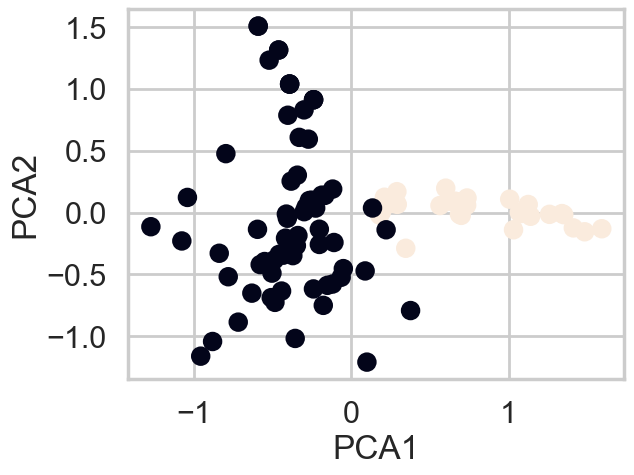

The Accuracy score measured as the average of silhouette Score is: 0.08. For a Agglomerative clustering model with 2 clusters.


In [299]:
#Create a DF with the customer name and the first 2 PCA components to be able to plot them in 2D
df_PCA = pd.DataFrame({'customer_name':pivot_df.reset_index()['customer_name'], 'cluster':labels, 'PCA1':x_cols_reduced[:,0], 'PCA2':x_cols_reduced[:,1]})
plt.scatter(x=df_PCA['PCA1'], y = df_PCA['PCA2'], c = df_PCA['cluster'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()
print(f"The Accuracy score measured as the average of silhouette Score is: {score:.2f}. For a {model} model with {numClusters} clusters." )

In [309]:
# Next we will be Using DBSCAN, we import the packages
from sklearn.cluster import DBSCAN
#create the model clustering and fit it to our data and save the cluster as labels
model = 'DBSCAN'
clustering = DBSCAN(min_samples = 2).fit(x_cols)
labels = clustering.labels_
numClusters = max(labels)+1
score = sklearn.metrics.silhouette_score(x_cols, clustering.labels_)

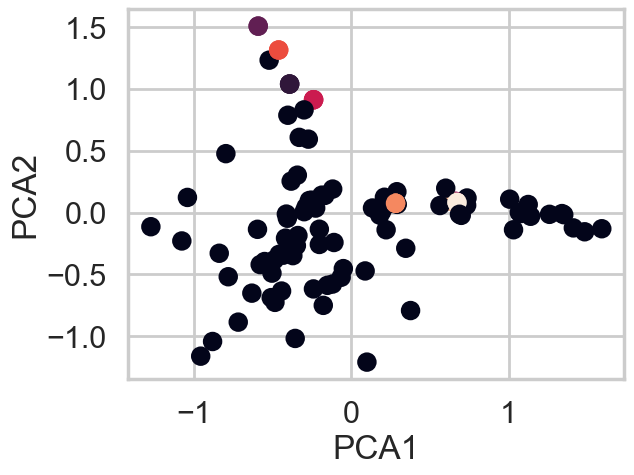

The Accuracy score measured as the average of silhouette Score is: -0.02. For a DBSCAN model with 8 clusters.


In [310]:
#Create a DF with the customer name and the first 2 PCA components to be able to plot them in 2D
df_PCA = pd.DataFrame({'customer_name':pivot_df.reset_index()['customer_name'], 'cluster':labels, 'PCA1':x_cols_reduced[:,0], 'PCA2':x_cols_reduced[:,1]})
plt.scatter(x=df_PCA['PCA1'], y = df_PCA['PCA2'], c = df_PCA['cluster'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()
print(f"The Accuracy score measured as the average of silhouette Score is: {score:.2f}. For a {model} model with {numClusters} clusters." )

After running the different models, the results show us that we might have gotten the best results using K-Means. some of the other algorithms tend to either overfit to our data and even then the average silhouette score shows there is no substantial structure in the data.

From the visual results, the best performing algorithm seems to be the agglomerative clustering followed by spectral clustering. The reason why agglomerative clusterin could be performing better might have to do with the fact that we are looking at the similarities (distance) between each point (or cluster) and grouping them as we go. From the results seen previously, we can tell that the data doesnt seem to have a strong structure so Agglomerative clustering does a good job at separating the 2 most different clusters without overfitting.